# Due Diligence - August 2023
Stock due diligence for my portfolio

## Economic Environment
The RBA's statement on monetary policy has showed that, domestically and internationally, inflation is beginning to ease as electricity prices fall from last years peak. However, service inflation around the globe persists with the tightening of the labour market/low unemployment rates.

### Key Points
- Inflation and Central Bank Policies:

    - Global headline inflation has eased, but core inflation remains persistent, particularly in services. Central banks in advanced economies are increasing policy rates to counter inflation. Monitor interest rate hikes and central bank actions as they can impact borrowing costs and investor sentiment. Labor Market and Consumer Demand:

    - Labor markets are tight, with low unemployment rates and strong demand relative to supply. Wage pressures might increase, affecting labor-intensive sectors and potentially impacting profit margins. Consumer demand remains strong, but services-based inflation could lead to cost challenges for businesses. Global Economic Growth and Commodities:

    - Global economic growth has slowed due to contractionary monetary policy and cost-of-living pressures. Monitor developments in global growth, as weaker growth can affect demand for Australian exports, especially commodities.
    
- China's Economic Outlook:

    - China's economic recovery has slowed, with concerns about property sector conditions. The downward revision of China's economic outlook could impact Australian resource and mining companies due to reduced demand for commodities.
    
- Market Sentiment and Risk Management:

    - Volatility in global markets could impact Australian market sentiment. Consider risk management strategies, such as diversification and stop-loss orders, to navigate potential market fluctuations. 
    
- Interest Rates and Investment Strategies:

    - Rising interest rates may influence borrowing costs and consumer spending patterns. Defensive sectors like utilities and consumer staples could provide stability during uncertain economic conditions. 

- Consumer Confidence and Consumption:

    - Weak consumption growth and headwinds to real household income growth can impact consumer confidence. Evaluate companies in sectors directly tied to consumer spending, such as retail and leisure, with caution.

- Technological Innovation and Energy Sector:

    - Allocate to technology companies that could benefit from innovation and advancements. Declining energy prices might benefit energy-intensive companies and those reliant on energy-related inputs.
    
## Strategy
The Australian economy is making a 'turning point' in it's inflationary cycle. The initial increase in inflation and hike in interest rates have cooled off. Energy and utility companies are now losing their purchasing power as energy becomes less expensive and markets more competitive. This quarters portfolio will focus on addressing the decrease in spending consumers will have till the end of the year. Consumer staples and high dividend stocks will be focused. Stocks will be scanned for high dividend yields, high free cash flow and low operating costs. The portfolio will be balanced to minimise volatility. 

## Load Environment

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import algorithmModule as am

In [2]:
# IMPORT ASX 200 TICKERS
asx200 = pd.read_csv("/Users/Justin/Downloads/Sheet1.csv")
asx200 = asx200.Code
yfTickers = [code + ".AX" for code in asx200]

In [3]:
# COLLECT STOCK DATA
dividendYield = []; returnOnEquity = []; freeCashFlow = []; operatingMargins = []; sector = [];
i = 0
for stock in yfTickers:
    obj = yf.Ticker(stock)
    info = obj.info
    try:
        dividendYield.append(info['dividendYield'])
    except:
        dividendYield.append('NaN')
    try:
        returnOnEquity.append(info['returnOnEquity'])
    except:
        returnOnEquity.append('NaN')
    try:
        freeCashFlow.append(info['freeCashflow'])
    except:
        freeCashFlow.append('NaN')
    try:
        operatingMargins.append(info['operatingMargins'])
    except:
        operatingMargins.append('NaN')
    try:
        sector.append(info['sector'])
    except:
        sector.append('NaN')

stock_data_dict = {
    "Ticker": yfTickers,
    "Sector": sector,
    "Dividend Yield": dividendYield,
    "Return On Equity": returnOnEquity,
    "Free Cash Flow": freeCashFlow,
    "Operating Margins": operatingMargins
}
    
stock_data = pd.DataFrame(stock_data_dict)
    

## Exploratory Data Analysis
Quick look at the data before any analysis

In [11]:
stock_data.head()

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,BHP.AX,Basic Materials,0.0596,0.29444,9077749760,0.39831
1,CBA.AX,Financial Services,0.0447,0.14068,NaN,0.56626
2,CSL.AX,Healthcare,0.0137,0.13851,307875008,0.2444
3,NAB.AX,Financial Services,0.0595,0.12203,NaN,0.55924
4,WBC.AX,Financial Services,0.067,0.08979,NaN,0.51326


The current order for the table remains in largest company to smallest company. First thing we can notice from the first 5 rows is the amount of NaN's in the 'Free Cash Flow' column. Could be an issue later on, might need to find another source to get data from. The below code will display the counts for each sector in the ASX 200.

In [18]:
stock_data["Sector"].value_counts()

Basic Materials           36
Financial Services        32
NaN                       28
Consumer Cyclical         20
Real Estate               17
Industrials               15
Healthcare                11
Energy                    11
Communication Services    10
Consumer Defensive         7
Technology                 7
Utilities                  6
Name: Sector, dtype: int64

Basic materials is the most common sector in the ASX 200. Not suprising as the Australian Economy relies a lot on mining and materials. Financial services comes second followed by a 'NaN' category. Lets take a closer look at the companies in the 'NaN' category to get an understanding of what type of companies are in there.

In [24]:
nan_sectors_df = pd.DataFrame()
nan_sectors_df["Ticker"] = stock_data.Ticker[stock_data["Sector"] == "NaN"]
names = []
for stock in stock_data.Ticker[stock_data["Sector"] == "NaN"]:
    obj = yf.Ticker(stock)
    info = obj.info
    names.append(info['longName'])
nan_sectors_df["Name"] = names

In [41]:
nan_sectors_df.head()

,Ticker,Name
39,VAS.AX,Vanguard Australian Shares Index ETF
45,APA.AX,APA Group
54,PMGOLD.AX,Perth Mint Gold
61,ALX.AX,Atlas Arteria Limited
65,VCX.AX,Vicinity Centres


We can see that some of these 'NaN' sectors are ETF's like the Vanguard. These have no financial data so gonna have to drop them.

In [51]:
stock_data = stock_data.loc[~(stock_data["Sector"] == 'NaN'),:]
stock_data.reset_index(inplace=True)

,index,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,0,BHP.AX,Basic Materials,0.0596,0.29444,9077749760,0.39831
1,1,CBA.AX,Financial Services,0.0447,0.14068,NaN,0.56626
2,2,CSL.AX,Healthcare,0.0137,0.13851,307875008,0.2444
3,3,NAB.AX,Financial Services,0.0595,0.12203,NaN,0.55924
4,4,WBC.AX,Financial Services,0.067,0.08979,NaN,0.51326
...,...,...,...,...,...,...,...
167,194,EVT.AX,Communication Services,0.0118,0.12125,86538496,0.08272
168,195,CEN.AX,Utilities,0.0501,0.045,-327000000,0.13456
169,197,BGL.AX,Basic Materials,NaN,-0.05959,-115525872,-25.75395
170,198,SGR.AX,Consumer Cyclical,NaN,-0.48809,452812512,0.06815


In [61]:
stock_data['Ticker'].astype('str')
stock_data['Sector'].astype('category')
stock_data['Dividend Yield'] = pd.to_numeric(stock_data['Dividend Yield'], errors='coerce')
stock_data['Return On Equity'] = pd.to_numeric(stock_data['Return On Equity'], errors='coerce')
stock_data['Free Cash Flow'] = pd.to_numeric(stock_data['Free Cash Flow'], errors='coerce')
stock_data['Operating Margins'] = pd.to_numeric(stock_data['Operating Margins'], errors='coerce')

/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/912161841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Dividend Yield'] = pd.to_numeric(stock_data['Dividend Yield'], errors='coerce')
/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/912161841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return On Equity'] = pd.to_numeric(stock_data['Return On Equity'], errors='coerce')
/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/91216

Data is now cleaned. Start with the descriptive statistics for the overall ASX.

In [64]:
stock_data.describe().drop(columns='index')

,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
count,149.000000,168.000000,1.550000e+02,172.000000
mean,0.042711,0.352896,3.124160e+10,-0.338949
std,0.026199,2.977481,3.861999e+11,3.879883
min,0.002300,-2.533410,-3.081000e+10,-32.324860
25%,0.022400,0.030865,7.861000e+06,0.081998
50%,0.037700,0.108575,1.407432e+08,0.184920
75%,0.059400,0.202120,4.896938e+08,0.389480
max,0.144000,38.516130,4.808246e+12,0.962610


The most interesting take away from the above dataframe is that the average operating margin is negative. This is possibly due to an outlier. A boxplot for each ratio is plotted below

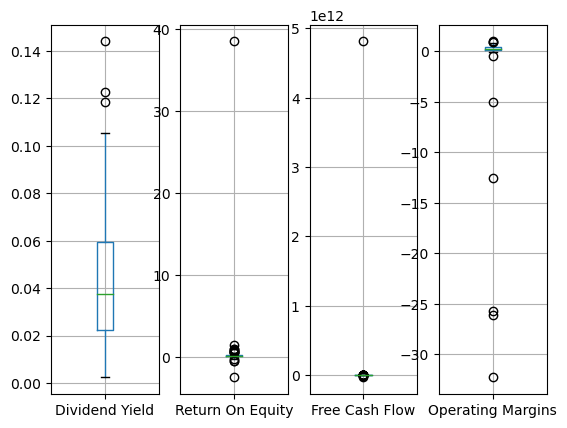

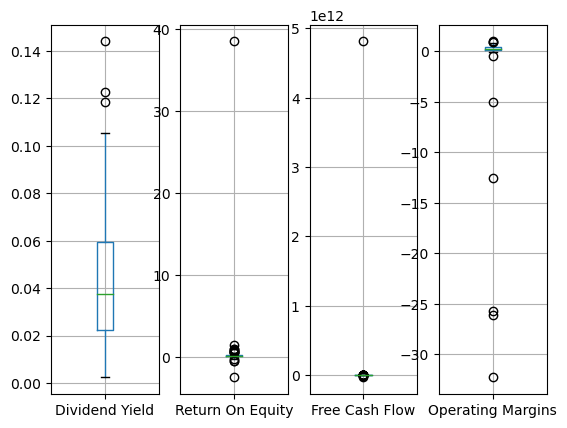

In [90]:
fig, ax = plt.subplots(1,4)
i = 0
for column in ['Dividend Yield','Return On Equity','Free Cash Flow','Operating Margins']:
    #ax[,i].figure()
    stock_data.boxplot(column,ax=ax[i])
    i += 1
plt.show()

Every indicator seems to have pretty substantial outliers that effect the average except for dividend yield

In [112]:
stock_data['Ticker'] = stock_data['Ticker'].astype('str')
stock_data["Sector"] = stock_data["Sector"].astype('category')
stock_data['Dividend Yield'] = pd.to_numeric(stock_data['Dividend Yield'], errors='coerce')
stock_data['Return On Equity'] = pd.to_numeric(stock_data['Return On Equity'], errors='coerce')
stock_data['Free Cash Flow'] = pd.to_numeric(stock_data['Free Cash Flow'], errors='coerce')
stock_data['Operating Margins'] = pd.to_numeric(stock_data['Operating Margins'], errors='coerce')
stock_data.drop(columns='index',inplace=True)

/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/912161841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Dividend Yield'] = pd.to_numeric(stock_data['Dividend Yield'], errors='coerce')
/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/912161841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Return On Equity'] = pd.to_numeric(stock_data['Return On Equity'], errors='coerce')
/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/91216

## Sector Analysis
The strategy is to pick out the high dividend stocks in each sector that are also financially healthy for the upcoming slow in economic growth.

### Financial Services

In [138]:
stock_data.drop(columns='index',inplace=True)
financial_services = stock_data.loc[stock_data["Sector"] == "Financial Services",:]\
                        .sort_values(by='Dividend Yield',ascending=False)
financial_services.reset_index(inplace=True)
financial_services.drop(columns='index',inplace=True)

/var/folders/xs/zddv9w2s69q__3dnkcd4533h0000gn/T/ipykernel_29176/2731317310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.drop(columns='index',inplace=True)


In [146]:
financial_services.loc[0:15,:]

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,BFL.AX,Financial Services,0.1227,0.30282,NaN,0.00000
1,PPT.AX,Financial Services,0.1055,0.07627,151124992.0,0.15398
2,IFL.AX,Financial Services,0.0738,0.00177,178262496.0,0.10999
3,BEN.AX,Financial Services,0.0679,0.08507,NaN,0.44880
4,WBC.AX,Financial Services,0.0670,0.08979,NaN,0.51326
5,BOQ.AX,Financial Services,0.0670,0.03446,NaN,0.29739
6,ANZ.AX,Financial Services,0.0660,0.10909,NaN,0.51321
7,GQG.AX,Financial Services,0.0614,0.75629,211177872.0,0.74095
8,VUK.AX,Financial Services,0.0610,0.08555,NaN,0.45313
9,NAB.AX,Financial Services,0.0595,0.12203,NaN,0.55924


Highest dividend paying financial sector stock is BFL. BFL is a conglomerate group based in Papua New Guinea that owns the largest bank across the Pacific Islands. They brag a strong balance sheet with a high return on equity and shareholder equity. Fee and commission income has been growing, indicating the bank's success in generating revenue from services beyond traditional interest income. BFL dividends don't seem to be franked

Another bank that looks like a good investment is NAB. They don't have the highest dividend yield but they have a high ROE and operating margin compared to the other banks.



Bank shortlist: BFL, NAB, MQG/CBA, 

### Consumer Defensive

Going into uncertain times with forecasts of slower economic growth, consumer staples are a definite must.

In [145]:
consumer_defensive = stock_data.loc[stock_data["Sector"] == "Consumer Defensive",:]\
                        .sort_values(by='Dividend Yield',ascending=False)
consumer_defensive.reset_index(inplace=True)
consumer_defensive.drop(columns='index',inplace=True)
consumer_defensive

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,MTS.AX,Consumer Defensive,0.0603,0.23930,2.716500e+08,0.02959
1,EDV.AX,Consumer Defensive,0.0404,0.14563,3.328750e+08,0.08608
2,COL.AX,Consumer Defensive,0.0377,0.32160,1.004375e+09,0.04183
3,TWE.AX,Consumer Defensive,0.0285,0.06633,2.147500e+07,0.19969
4,WOW.AX,Consumer Defensive,0.0254,0.28626,1.308200e+09,0.04724
5,IEL.AX,Consumer Defensive,0.0158,0.30653,1.297591e+08,0.22463
6,A2M.AX,Consumer Defensive,NaN,0.12361,7.541062e+07,0.12647


MTS, Metcash, can be determined to have the highest dividend yield from the consumer defensive sector. However, it's return on equity is pretty average and it's operating margins suck. However, this is likely due to an increase in fuel prices which is expected to ease in the next year.

EDV are a drinks supplying company. Even though they are consumer staple, price of alochol is increasing fast due to taxes and inflation. It's something consumer's would probably buy less of during a economic cycle like this.

Coles are a very safe investment. Consumer giant. High dividend yield and ROE compared to Woolies.

Consumer Defensive Shortlist: MTS, COL

### Healthcare
Healthcare is another safe sector to buy in to during periods of slow economic growth.

In [148]:
healthcare = stock_data.loc[stock_data["Sector"] == "Healthcare",:]\
                        .sort_values(by='Dividend Yield',ascending=False)
healthcare.reset_index(inplace=True)
healthcare.drop(columns='index',inplace=True)
healthcare

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,SHL.AX,Healthcare,0.0324,0.09224,768003520.0,0.12464
1,ANN.AX,Healthcare,0.0299,0.09451,107200000.0,0.12718
2,EBO.AX,Healthcare,0.0288,0.11827,421634112.0,0.03639
3,SNZ.AX,Healthcare,0.0197,0.13069,-46647752.0,0.05416
4,FPH.AX,Healthcare,0.0183,0.14582,26937500.0,0.21011
5,RHC.AX,Healthcare,0.0182,NaN,NaN,0.03831
6,CSL.AX,Healthcare,0.0137,0.13851,307875008.0,0.24440
7,COH.AX,Healthcare,0.0132,0.17505,230562496.0,0.20985
8,RMD.AX,Healthcare,0.0117,0.23965,415360256.0,0.27279
9,PME.AX,Healthcare,0.0047,0.50433,46178000.0,0.67318


The healthcare stocks are low dividend compared to other sectors.

Healthcare Shortlist: SHL, ANN

### Basic Materials
Backbone of the Australian economy.

In [150]:
basic_materials = stock_data.loc[stock_data["Sector"] == "Basic Materials",:]\
                        .sort_values(by='Dividend Yield',ascending=False)
basic_materials.reset_index(inplace=True)
basic_materials.drop(columns='index',inplace=True)
basic_materials.loc[0:10,:]

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,ZIM.AX,Basic Materials,0.1185,0.18191,2.228362e+07,0.47918
1,CRN.AX,Basic Materials,0.1022,0.32217,2.704711e+08,0.18091
2,FMG.AX,Basic Materials,0.0936,0.35176,3.967250e+09,0.49637
3,AWC.AX,Basic Materials,0.0894,-0.06515,-1.268600e+07,-12.55556
4,DRR.AX,Basic Materials,0.0784,1.44672,1.792111e+08,0.95499
5,IPL.AX,Basic Materials,0.0680,0.14487,-1.671150e+09,0.17639
6,FBU.AX,Basic Materials,0.0661,0.06826,2.523750e+08,0.08832
7,BHP.AX,Basic Materials,0.0596,0.29444,9.077750e+09,0.39831
8,NIC.AX,Basic Materials,0.0533,0.13454,-1.862741e+07,0.21238
9,RIO.AX,Basic Materials,0.0484,0.15527,4.483250e+09,0.27283


ZIM has the highest dividend yield. Company based in Africa, not franked dividends.

Basic Materials Shortlist: FMG, ZIM, BHP


### Communication Services

In [151]:
communication_services = stock_data.loc[stock_data["Sector"] == "Communication Services",:]\
                        .sort_values(by='Dividend Yield',ascending=False)
communication_services.reset_index(inplace=True)
communication_services.drop(columns='index',inplace=True)
communication_services.loc[0:10,:]

,Ticker,Sector,Dividend Yield,Return On Equity,Free Cash Flow,Operating Margins
0,SPK.AX,Communication Services,0.0541,0.66471,8.655250e+08,0.28323
1,CNU.AX,Communication Services,0.0503,0.02390,1.596875e+09,0.24592
2,NEC.AX,Communication Services,0.0501,0.09855,2.075966e+08,0.16369
3,TLS.AX,Communication Services,0.0424,0.11837,2.008375e+09,0.14682
4,TPG.AX,Communication Services,0.0333,0.04344,4.808246e+12,0.05688
5,CAR.AX,Communication Services,0.0233,0.31334,1.446014e+08,0.37549
6,SEK.AX,Communication Services,0.0199,0.08869,1.290525e+09,0.33094
7,DHG.AX,Communication Services,0.0161,0.03572,7.022000e+06,0.18029
8,EVT.AX,Communication Services,0.0118,0.12125,8.653850e+07,0.08272
9,REA.AX,Communication Services,0.0104,0.23935,3.138625e+08,0.38897


Communication Services Shortlist: SPK

## Expected Return

In [36]:
from pypfopt import risk_models,black_litterman
import yfinance as yf

ticker_list = ['BFL.AX', 'NAB.AX', 'MTS.AX', 'COL.AX', 'FMG.AX', 'ZIM.AX','ANN.AX','SHL.AX','BEN.AX', 'SPK.AX']

data = yf.download(ticker_list,'2021-08-29',period="1d")['Adj Close']

shortlist_dict = {'BFL.AX': 0.1068,
                  'NAB.AX':0.1872,
                  'MTS.AX':0.1479,
                  'COL.AX':0.049,
                  'FMG.AX':0.08,
                  'ZIM.AX':0.14,
                  'ANN.AX':0.2336,
                  'SHL.AX':0.1289,
                  'BEN.AX':0.1957,
                  'SPK.AX':0.0564}

data.head()


[*********************100%%**********************]  10 of 10 completed


,ANN.AX,BEN.AX,BFL.AX,COL.AX,FMG.AX,MTS.AX,NAB.AX,SHL.AX,SPK.AX,ZIM.AX
Date,,,,,,,,,,
2021-08-30,34.115696,8.393072,4.400409,16.799398,16.422834,3.640936,24.869463,40.297066,4.212039,19.377134
2021-08-31,33.983498,8.946908,4.400409,17.092466,16.176336,3.667906,25.041039,41.044186,4.194077,19.453857
2021-09-01,34.672806,9.018198,4.400409,17.101921,15.660236,3.578006,25.591887,40.949612,4.221019,19.615831
2021-09-02,34.030720,8.991464,4.321831,16.884483,15.952950,3.604976,25.727343,40.892868,4.212039,19.854530
2021-09-03,34.701126,9.096707,4.282541,16.771038,16.060793,3.631946,25.916979,41.375183,4.185095,20.417173


In [37]:
from pypfopt import EfficientFrontier

S = risk_models.sample_cov(data)

bl = black_litterman.BlackLittermanModel(S, pi="equal", absolute_views=shortlist_dict, omega="default")
rets = bl.bl_returns()

ef = EfficientFrontier(rets, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("/Users/Justin/Desktop/Investing/weights.csv") # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


OrderedDict([('ANN.AX', 0.14689), ('BEN.AX', 0.09747), ('BFL.AX', 0.13422), ('COL.AX', 0.03401), ('FMG.AX', 0.02161), ('MTS.AX', 0.10686), ('NAB.AX', 0.19754), ('SHL.AX', 0.0597), ('SPK.AX', 0.14999), ('ZIM.AX', 0.05171)])
Expected annual return: 13.0%
Annual volatility: 11.6%
Sharpe Ratio: 0.94


(0.1296608068274232, 0.11646611844692721, 0.9415683143711435)

In [44]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(data)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=11001)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'NAB.AX': 76, 'SPK.AX': 359, 'ANN.AX': 69, 'BFL.AX': 276, 'MTS.AX': 319, 'BEN.AX': 114, 'SHL.AX': 21, 'ZIM.AX': 23, 'COL.AX': 23, 'FMG.AX': 12}
Funds remaining: $0.70


In [39]:
cleaned_weights

OrderedDict([('ANN.AX', 0.14689),
             ('BEN.AX', 0.09747),
             ('BFL.AX', 0.13422),
             ('COL.AX', 0.03401),
             ('FMG.AX', 0.02161),
             ('MTS.AX', 0.10686),
             ('NAB.AX', 0.19754),
             ('SHL.AX', 0.0597),
             ('SPK.AX', 0.14999),
             ('ZIM.AX', 0.05171)])

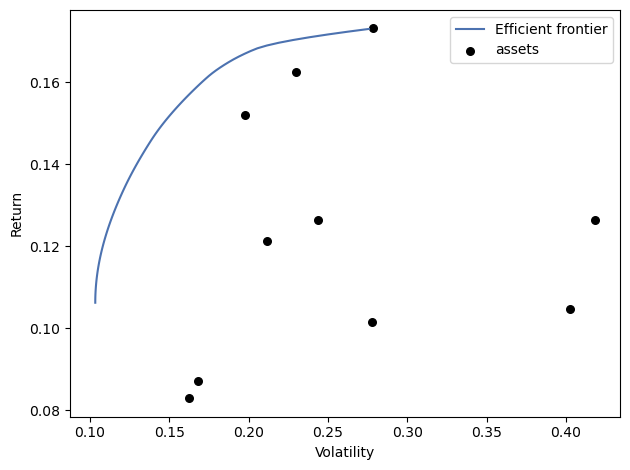

In [42]:
from pypfopt import plotting
import matplotlib.pyplot as plt
ef2 = EfficientFrontier(rets, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.show()

In [43]:
latest_prices

ANN.AX    23.350000
BEN.AX     9.440000
BFL.AX     5.360000
COL.AX    16.100000
FMG.AX    20.500000
MTS.AX     3.680000
NAB.AX    28.410000
SHL.AX    31.990000
SPK.AX     4.590000
ZIM.AX    24.549999
Name: 2023-08-29 00:00:00, dtype: float64